## 项目简单介绍
该数据集包含了两家位于葡萄牙的酒店预订信息，一家城市酒店及一家度假酒店。数据的时间跨度从2015年7月1日至2017年8月31日，数据包含了诸如预订的时间，停留时间，成人，儿童和/或婴儿的数量以及可用停车位的数量等信息。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

file_path = r"../data/hotel_bookings.csv"
data = pd.read_csv(file_path)
#  查看数据的行、列
print(data.shape)

(119390, 32)


In [4]:
# 查看数据非空数据量
data.count()

# NAN统计,county、agent、company、children中这四列出现nan数据
data.isna().sum() 

# # 数据整体描述
# data.describe()

# # 数据信息
# data.info()

# # 简单查看一下数据
# data.head()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 数据缺失值查询与处理 
通过describe()方法看出：

children 这一列少了4个值，且均值，4分位值均为0，因此填充为0值

country、agent、company：缺失值较多，分别为488，16340，112593。

其中agent为个人用户，填充0；其余两列进行删除，后期可以考虑单独填充

In [5]:
# # df1 为去除nan列数据
df1 = data.drop(["country", "company"],axis=1)
df1.shape

# 填充nan
df1["children"].fillna(0,inplace=True)
df1["agent"].fillna(0,inplace=True)

# 查看填充后的结果,无nan列
a = df1.isna().sum()
print(a)
print(df1.shape)

'''均值填充含nan的列
for column in list(df.columns[df.isnull().sum() > 0]):

mean_val = df[column].mean()

df[column].fillna(mean_val, inplace=True)'''
""
# list_col = list(data.columns[data.isnull().sum()>0])
# for col in  list_col:
#     print(col,list_col.index(col),"type:",type(col))


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

''

### 数据查重并处理

In [6]:
# 查询重复行数,此方法不算第一次出现“重复行”，
# 只拿后面的行往前比，所以第一次出现的内容就不算重复行，比如一行重复了3次，那↓方法反馈sum()=2
print(df1.duplicated().sum())

# 查看哪些记录出现重复值
rep_rows = df1[df1.duplicated(keep=False)].shape[0]
print(rep_rows)

# 查看哪些重复的值，其实数量特别多，没啥意义
df1[df1.duplicated(keep=False)]

33762
42483


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,0,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [7]:
# df1 = pd.read_csv("hotel_demand_df1.csv") git没保存源代码，之前我已经将数据去重复值并进行单独保存
# 此处复现去重操作
df1.drop_duplicates(keep="first",inplace=True)
print("去重后：",df1.shape)

去重后： (85628, 30)


### 异常值发现并处理

In [8]:
# 针对数据进行异常值筛查
# 1.预定没有取消，但周中和周末天数综合=0,即客人当天入住当天退房，暂且不删除
no_days = df1[df1["is_canceled"]+df1["stays_in_weekend_nights"]+df1["stays_in_week_nights"]==0]
# 2.预定没有取消，但客人数量从成人、儿童、婴儿总和为0
no_guest = df1[df1["is_canceled"]+df1["adults"]+df1["children"]+df1["babies"]==0].index # 获取异常值index
# print(type(no_guest)) # 没有取消但是并没有人来，因此是异常值
df1.drop(no_guest,inplace=True)
# print(df1.shape)

In [9]:
df1["meal"].unique() # 可以查看这一列有哪些值
df1["meal"].value_counts() # 可以查看这一列各类数值的求和
# 通过meal这一列维度的定义，可以发现undefined 和 SC相同，因此进行替换
df1["meal"].replace("Undefined","SC",inplace=True)
df1["meal"].value_counts() # 处理后的结果

BB    66483
SC     9752
HB     8885
FB      359
Name: meal, dtype: int64

In [10]:
print(df1["hotel"].value_counts())


City Hotel      51893
Resort Hotel    33586
Name: hotel, dtype: int64


### 为画图做准备（不同系统切换font类型）

In [11]:
from matplotlib import font_manager
# 为画图做准备
warnings.filterwarnings("ignore")

# 设置中文字体类型
# Mac
# my_font = font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=10)
# Windows
my_font = font_manager.FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc',size=10)
# 使用中文字体显示
plt.rcParams["font.sans-serif"] = "PingFang"
# 正常显示负数
plt.rcParams["axes.unicode_minus"] = False
pd.set_option("display.max_columns",36)

## 酒店基本情况分析
对取消的订单进行处理，即排除被取消的预定需求

City Hotel      0.690960
Resort Hotel    0.762639
Name: hotel, dtype: float64
[0.6909602451197657, 0.762639194902638]
[0.30903975488023433, 0.237360805097362]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


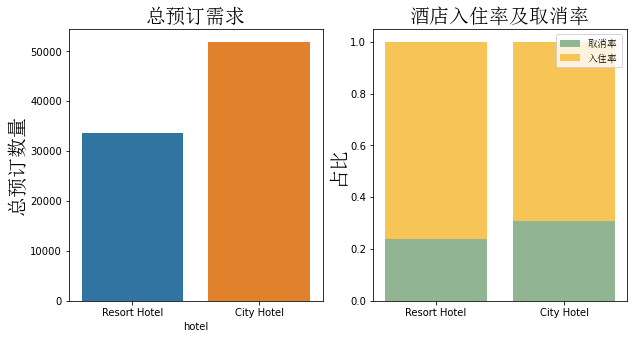

In [12]:
# 1.总订单量的分析
# 1.1 对比两类酒店，取消订单与未取消订单，loc方法本身需要传[“行”，“列”]参数，既可以是数值也可以是名称
nocancel_data = df1.loc[df1["is_canceled"]==0] # loc方法可以采用条件筛选
cancel_data = df1.loc[df1["is_canceled"]==1]
# nocancel_data.head()
# nocancel_data_hotel = df1.loc[df1["is_canceled"]==0,["hotel","is_canceled"]] # 条件 + 列名
# nocancel_data_hotel.head()

# 非取消占比,分别用城市酒店与度假酒店进行数据对比
nocancel_percent = nocancel_data["hotel"].value_counts()/df1["hotel"].value_counts() # series类型
nocancel_percent_2list = list(nocancel_percent)
print(nocancel_percent)
print(nocancel_percent_2list)
cancel_percent = cancel_data["hotel"].value_counts()/df1["hotel"].value_counts() # series类型
cancel_percent_2list = list(cancel_percent) # 之所以变成list类型，因为下面画图参数需要
print(cancel_percent_2list)


fig,axes = plt.subplots(1,2,figsize=(10,5))
ax1 = sns.countplot(x="hotel",data=df1,ax=axes[0]) 
# countplot(),是计数画图工具，在第0张画布上，x方向代表hotel，hotel必须是后面data的列元素，data是要统计的数据，
# 整体理解：以df1作为data数据，从data中抽取“hotel”，进行分类和统计，最终画在axes[0]这张画布上

ax1.set_title("总预订需求",fontproperties=my_font,fontsize=20)
ax1.set_ylabel("总预订数量",fontproperties=my_font,fontsize=20)

ax2 = plt.bar([1,2],cancel_percent_2list[::-1],tick_label=["Resort Hotel","City Hotel"],color="#91b493",label="取消率")
# plt.bar([x轴坐标范围]，数据内容，x轴坐标注释（显示），bar颜色，label图例注释)，其中数据内容是关键
ax2 = plt.bar([1,2],nocancel_percent_2list[::-1],bottom=cancel_percent_2list[::-1],color="#F6C555",label="入住率")
plt.title("酒店入住率及取消率",fontproperties=my_font,fontsize=20)
plt.ylabel("占比",fontproperties=my_font,fontsize=20)
plt.legend(prop=my_font)

### 城市酒店比度假酒店的总预定量要大，
对比入住/取消率可以看出城市酒店的入住率要更高，这可能与城市酒店所在的区域以及满足人们需求的各项功能相关

<function matplotlib.pyplot.show(close=None, block=None)>

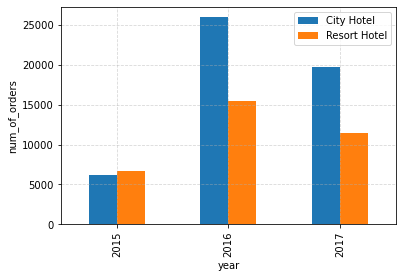

In [13]:
# 2.最简单的统计分析，2015-2017年两类酒店每年预订的总数是多少
# 按照hotel和arrival_date_year来进行分组,并hotel这列计数
group_by_hotel_year = df1.groupby(["hotel","arrival_date_year"])["hotel"].count()
# print(group_by_hotel_year.count())
# print(type(group_by_hotel_year))
# print(group_by_hotel_year)

C_2015 = group_by_hotel_year["City Hotel"][2015]
groups_by_h_y = df1.groupby(["hotel","arrival_date_year"])
# 定义年份和订单总量，两个列表
years = list()
hotel_orders_total_count = list()
for hotel,group in groups_by_h_y:
#     print(hotel)
    years.append(hotel[1])
#     print("-"*40)
#     print(group["arrival_date_year"].count())
    hotel_orders_total_count.append(int(group["arrival_date_year"].count()))
# print(years[:3])
# print(hotel_orders_total_count)
years = years[:3]
City_Hotel_orders = hotel_orders_total_count[:3]
Resort_Hotel_orders = hotel_orders_total_count[3:]
s = pd.DataFrame(
    {"City Hotel":City_Hotel_orders,
     "Resort Hotel":Resort_Hotel_orders
    },
    index=years
    )
s.plot(kind="bar")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("year")
plt.ylabel("num_of_orders")
plt.show

In [14]:
# 上述图片没有数据标签，不太好看，我们考虑另一种办法添加数据标签
# # 使用hist画直方图
# plt.hist([City_Hotel_orders,Resort_Hotel_orders],bins,label=["City Hotel","Resort Hotel"])
# plt.show()  这一部分比较耽误时间，暂且放置一旁

### 两种酒店年预定量占比
2015年城市酒店比度假酒店预定量要少，而之后的2016与2017年城市酒店比度假酒店的预定量有明显的增多,这是因为2015年和2017年的月份较少，导致这样一个情况



In [15]:
nocancel_data.head

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [16]:
# 查看"arrival_date_year"这一列有多少年
# nocancel_data["arrival_date_year"].unique() 显示2015、2016、2017年

# 查看这3年，每月的入住量走势图，
# 试了很多办法，最终决定给nocancel_data增加一列时间序列

  # 1.将nocancel_data["arrival_date_month"] 这一列换成数字形式,这里注意，换完之后就不要在运行这段了
month2num = {"January":"1","February":"2","March":"3","April":"4","May":"5","June":"6","July":"7","August":"8","September":"9","October":"10","November":"11","December":"12"}
a = nocancel_data["arrival_date_month"]
for i in list(a.index):
    a[i] = a[i].replace(a[i],month2num[a[i]])
print(nocancel_data["arrival_date_month"])

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 61470, dtype: object


In [17]:
  # 2.对dataframe中的arrival_date_*这几列进行拼接 arrival_date_year, arrival_date_month,arrival_date_day_of_month
def To_ten_digit(args):
    '''
        将不足两位的数据调整为两位数，即3变为03
    '''
    if int(args) < 10:
        return "0"+str(args)
    else:
        return str(args)
    
nocancel_data["arrival_date_year"] = nocancel_data["arrival_date_year"].apply(To_ten_digit)
nocancel_data["arrival_date_month"] = nocancel_data["arrival_date_month"].apply(To_ten_digit)
nocancel_data["arrival_date_day_of_month"] = (nocancel_data["arrival_date_day_of_month"]
                                              .apply(To_ten_digit))

nocancel_data["arrival_date"] = (nocancel_data["arrival_date_year"]
                                +"-"+nocancel_data["arrival_date_month"]
                                +"-"+nocancel_data["arrival_date_day_of_month"])
print(nocancel_data["arrival_date"])

0         2015-07-01
1         2015-07-01
2         2015-07-01
3         2015-07-01
4         2015-07-01
             ...    
119385    2017-08-30
119386    2017-08-31
119387    2017-08-31
119388    2017-08-31
119389    2017-08-29
Name: arrival_date, Length: 61470, dtype: object


In [18]:
    # 3. 通过上述arrival_date查看所有
nocancel_data["arrival_date"] = pd.to_datetime(nocancel_data["arrival_date"])
nocancel_data.head
# nocancel_data.loc[0,"arrival_date"]

<bound method NDFrame.head of                hotel  is_canceled  lead_time arrival_date_year  \
0       Resort Hotel            0        342              2015   
1       Resort Hotel            0        737              2015   
2       Resort Hotel            0          7              2015   
3       Resort Hotel            0         13              2015   
4       Resort Hotel            0         14              2015   
...              ...          ...        ...               ...   
119385    City Hotel            0         23              2017   
119386    City Hotel            0        102              2017   
119387    City Hotel            0         34              2017   
119388    City Hotel            0        109              2017   
119389    City Hotel            0        205              2017   

       arrival_date_month  arrival_date_week_number arrival_date_day_of_month  \
0                      07                        27                        01   
1              

In [19]:
y_m_data = nocancel_data.groupby([nocancel_data["hotel"],
                                  nocancel_data["arrival_date"].dt.year,
                                  nocancel_data["arrival_date"].dt.month]
                                 )["is_canceled"].count()
y_m_da_meanadr = nocancel_data.groupby([nocancel_data["hotel"],
                                  nocancel_data["arrival_date"].dt.year,
                                  nocancel_data["arrival_date"].dt.month]
                                 )["adr"].mean()

# 通过分组发现，日期为2015年7月 - 2017年8月，可以以此提取City Hotel，Resort Hotel的月变化数据
years = [2015, 2016, 2017]
months = list(range(1,13))
date_list = []

C_H_list = list()
R_H_list = list()
C_H_meanadr = list()
R_H_meanadr = list()

for i in years:
    if i == 2015:
        for j in months[6:]:
            date_list.append(str(i)+"-"+str(j))
            C_H_list.append(y_m_data.loc["City Hotel"][i][j])
            R_H_list.append(y_m_data.loc["Resort Hotel"][i][j])
            C_H_meanadr.append(y_m_da_meanadr.loc["City Hotel"][i][j])
            R_H_meanadr.append(y_m_da_meanadr.loc["Resort Hotel"][i][j])
    elif i == 2016:
        for j in months:
            date_list.append(str(i)+"-"+str(j))
            C_H_list.append(y_m_data.loc["City Hotel"][i][j])
            R_H_list.append(y_m_data.loc["Resort Hotel"][i][j])
            C_H_meanadr.append(y_m_da_meanadr.loc["City Hotel"][i][j])
            R_H_meanadr.append(y_m_da_meanadr.loc["Resort Hotel"][i][j])
    else:
        for j in months[:8]:
            date_list.append(str(i)+"-"+str(j))
            C_H_list.append(y_m_data.loc["City Hotel"][i][j])
            R_H_list.append(y_m_data.loc["Resort Hotel"][i][j])
            C_H_meanadr.append(y_m_da_meanadr.loc["City Hotel"][i][j])
            R_H_meanadr.append(y_m_da_meanadr.loc["Resort Hotel"][i][j])
# print(C_H_list)
# print("-"*50)
# print(C_H_meanadr)
# print("-"*50)
# print(date_list)
# print("-"*50)
# print(R_H_list)
# print("-"*50)
# print(R_H_meanadr)

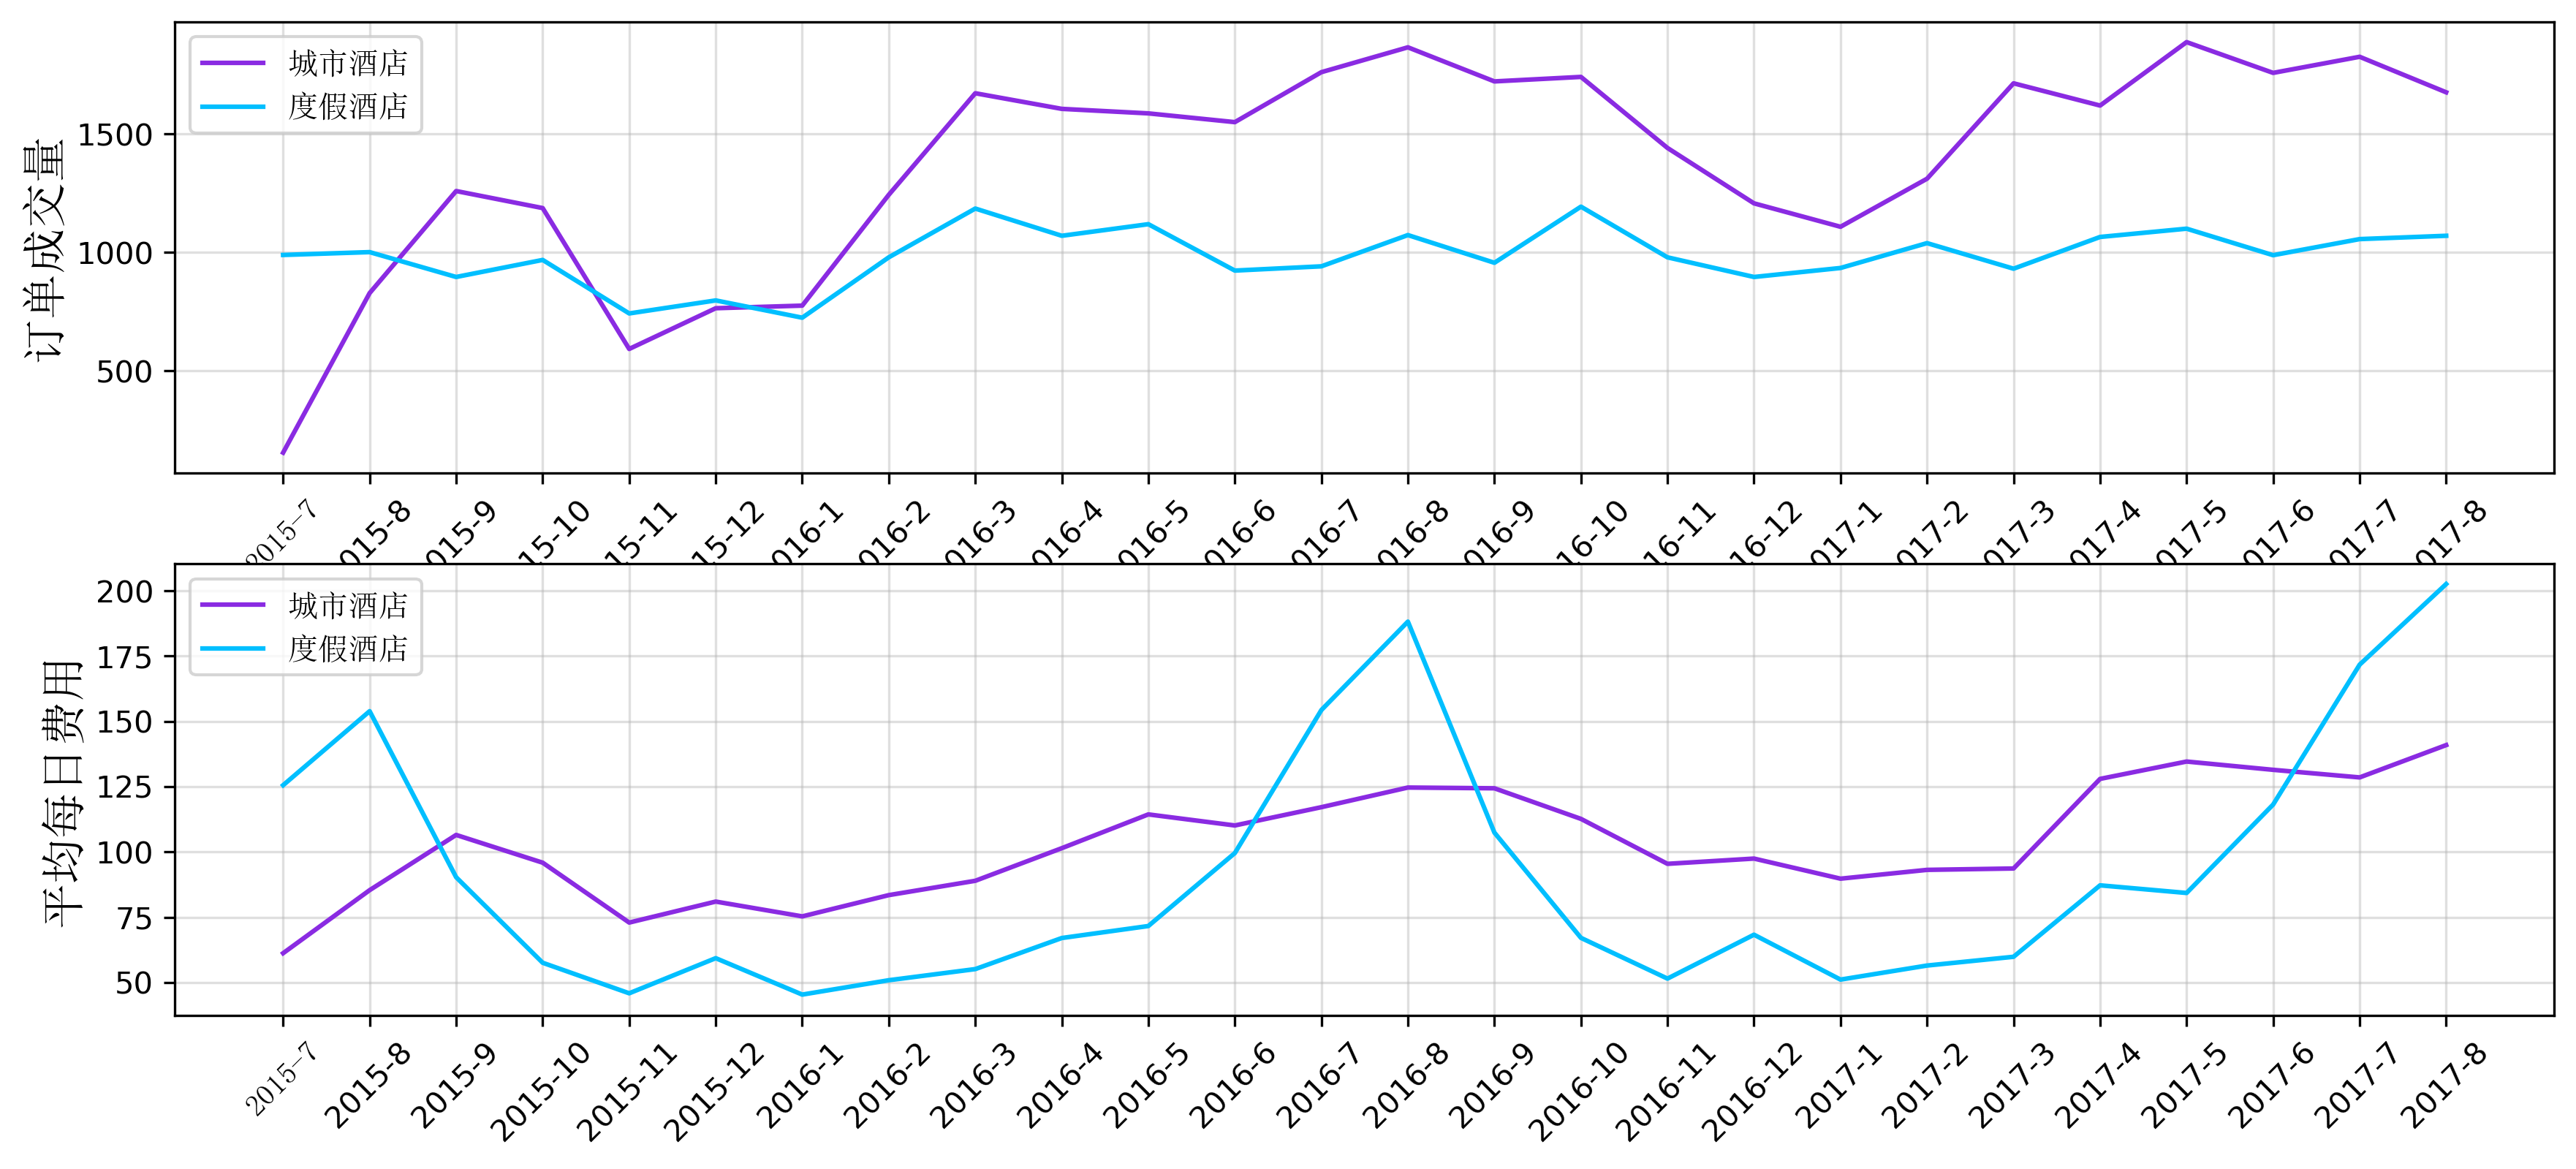

In [20]:
x = range(0,len(date_list))
plt.figure(figsize=(14,6),dpi=300)
ax1 = plt.subplot(211)
ax1.tick_params(labelbottom='off')
plt.plot(x,C_H_list,label="城市酒店",color="blueviolet")
plt.plot(x,R_H_list,label="度假酒店",color="deepskyblue")
plt.xticks(x[::1],date_list[::1],rotation=45,fontproperties=my_font)
# frame = plt.gca() 让x轴坐标消失
# frame.axes.get_xaxis().set_visible(False) 让x轴坐标消失

# plt.xlabel("年月-时间",fontproperties=my_font,fontsize=20)
plt.ylabel("订单成交量",fontproperties=my_font,fontsize=15)
plt.grid(alpha=0.4,linestyle="-")
plt.legend(prop=my_font,loc="upper left")



# 好看的matplotlib配色 见：https://zhuanlan.zhihu.com/p/65220518

# ax2 = plt.subplot(212,sharex = ax1) # ax1 和 ax2 共用一套x轴
ax2 = plt.subplot(212)
plt.plot(x,C_H_meanadr,label="城市酒店",color="blueviolet")
plt.plot(x,R_H_meanadr,label="度假酒店",color="deepskyblue")
plt.xticks(x[::1],date_list[::1],rotation=45,fontproperties=my_font)
# plt.xlabel("年月-时间",fontproperties=my_font,fontsize=15)
plt.ylabel("平均每日费用",fontproperties=my_font,fontsize=15)
plt.grid(alpha=0.4,linestyle="-")
plt.legend(prop=my_font,loc="upper left")

plt.show()

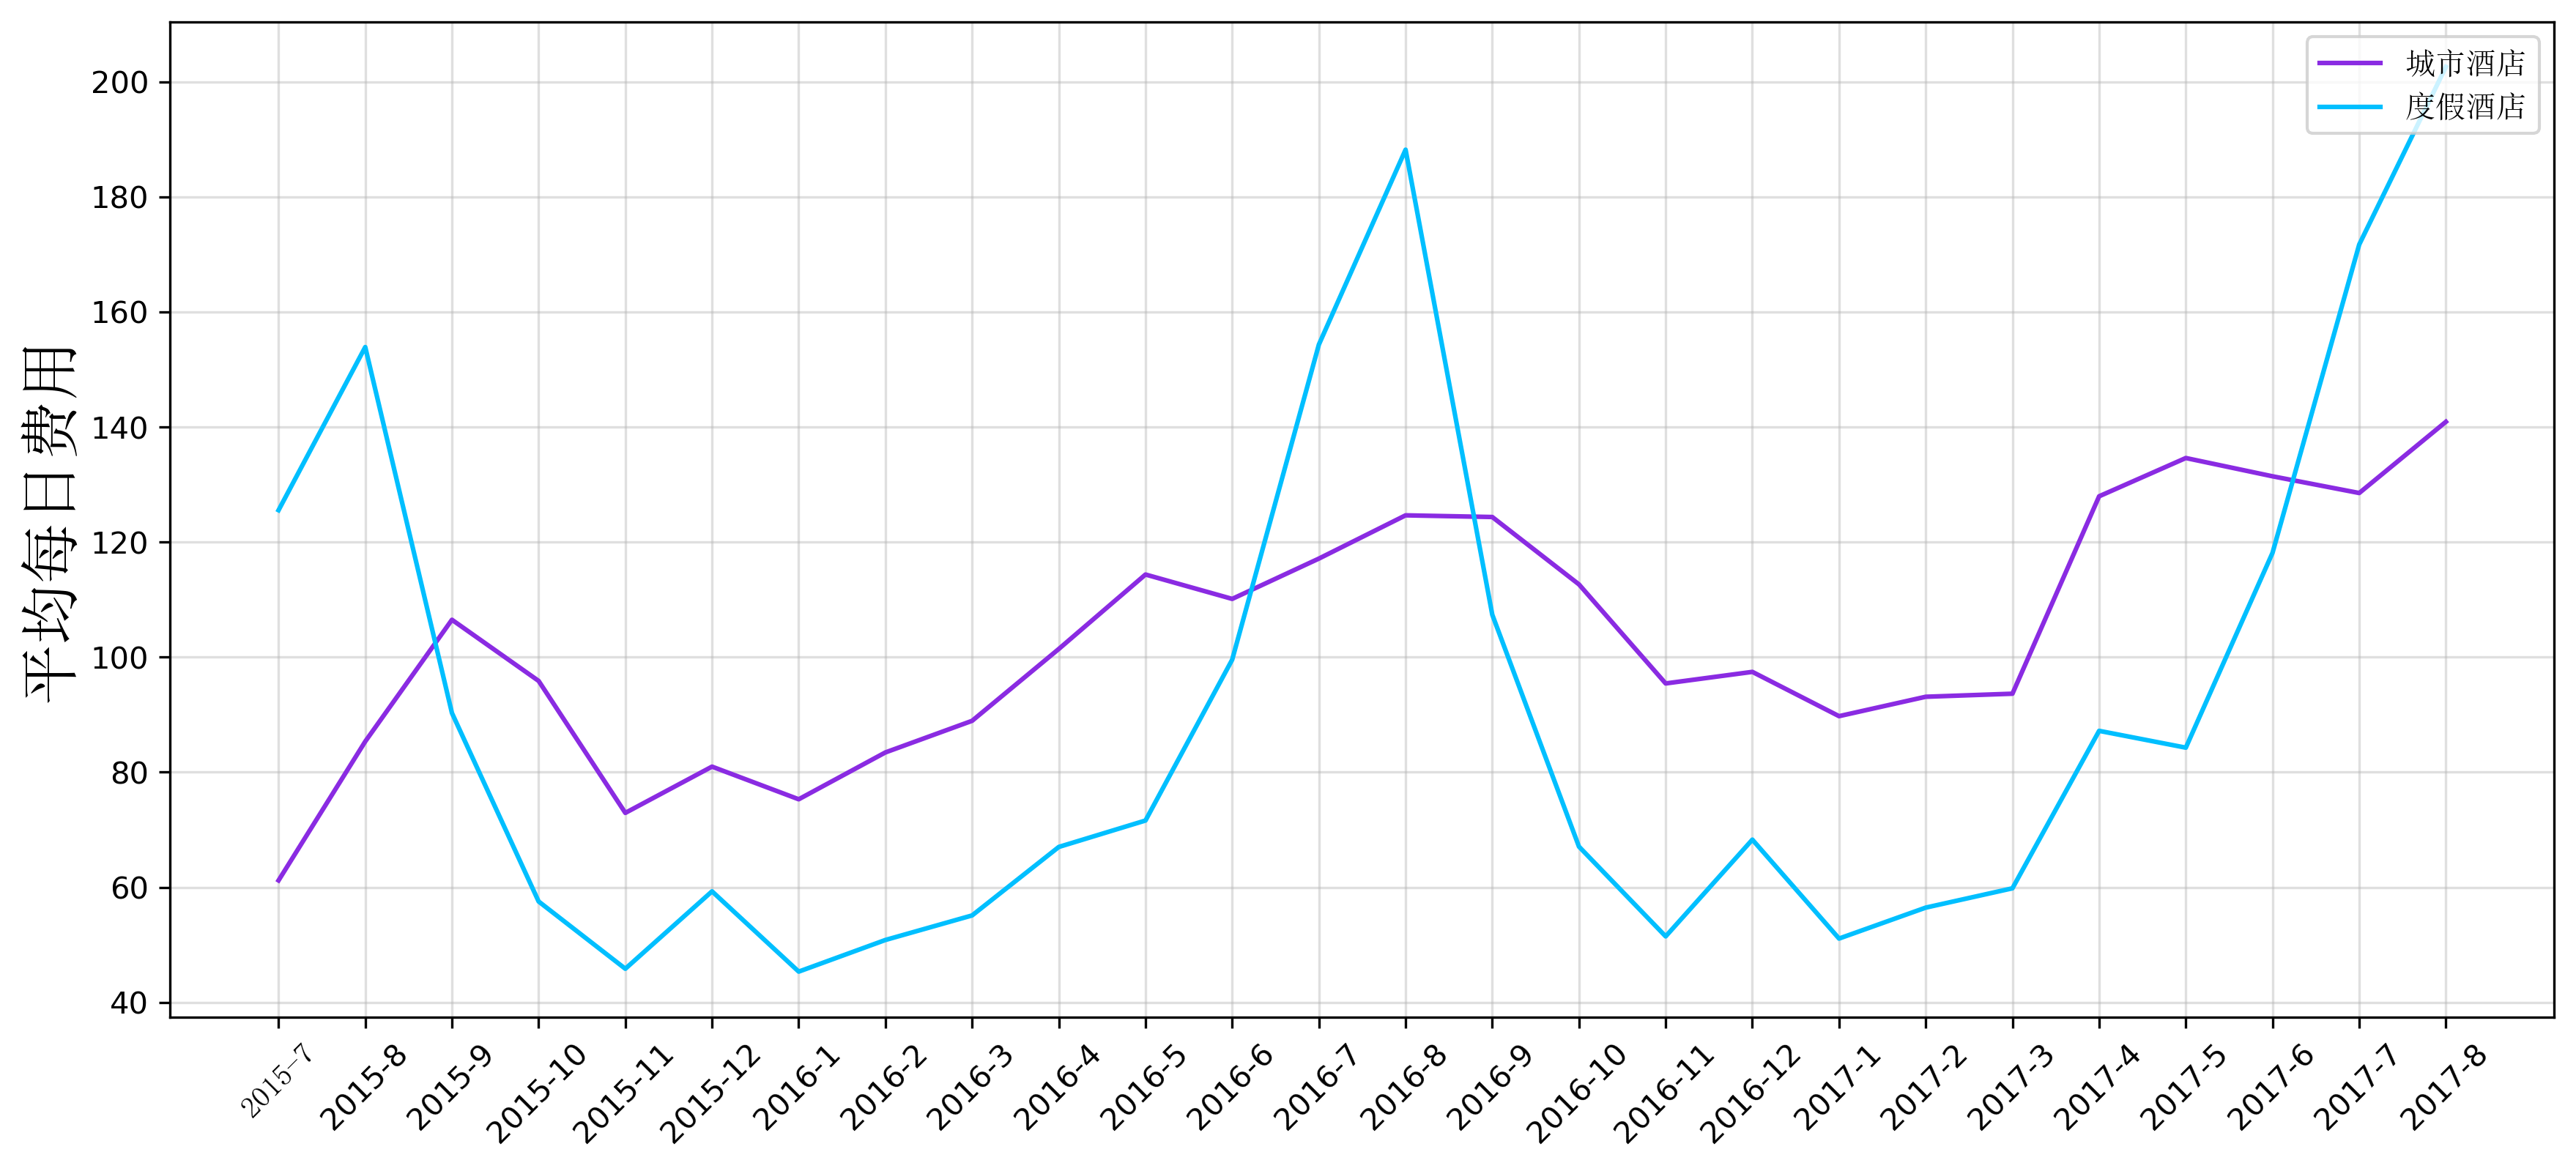

In [21]:
x = range(0,len(date_list))
plt.figure(figsize=(14,6),dpi=300)
plt.plot(x,C_H_meanadr,label="城市酒店",color="blueviolet")
plt.plot(x,R_H_meanadr,label="度假酒店",color="deepskyblue")
# 好看的matplotlib配色 见：https://zhuanlan.zhihu.com/p/65220518

plt.xticks(x[::1],date_list[::1],rotation=45,fontproperties=my_font)
# plt.xlabel("年月-时间",fontproperties=my_font,fontsize=20)
plt.ylabel("平均每日费用",fontproperties=my_font,fontsize=20)
plt.grid(alpha=0.4,linestyle="-")
plt.legend(prop=my_font,loc="upper right")
plt.show()

### 城市酒店相较于度假酒店的预定成交量高，
城市酒店成交额总体上扬，度假酒店的预定成交量较为平稳

城市酒店的每年11月至次年2月是预订成交淡季

度假酒店的2015年11月-12月呈现明显减少趋势，可以结合导致此情况的原因

## 用户行为分析

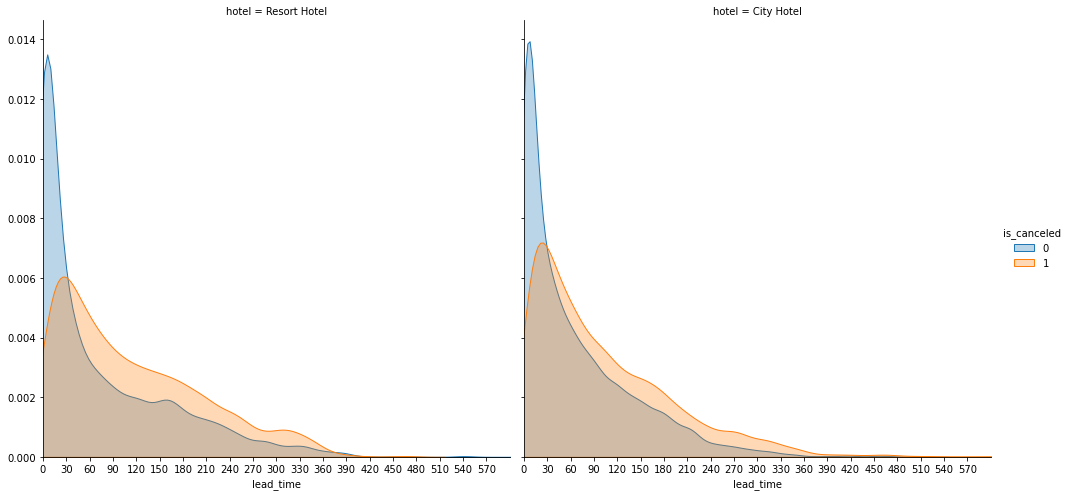

In [22]:
# 考察用户提前预定天数与取消与否的关系
is_canceled_plt=sns.FacetGrid(df1,col='hotel',hue='is_canceled',height=7,xlim=(0,600)).set(xticks=np.arange(0,600,30))
# sns.FacetGrid.
is_canceled_plt.map(sns.kdeplot,'lead_time',shade=True,alpha=0.3)
is_canceled_plt.add_legend()


### 提前预定时长与最终订单被取消的关系
通过上图可以看到城市酒店与度假酒店提前预定的时长与最终订单被取消的关系一致

1.预定日期小于30天的客户，倾向于不取消订单

2.预定的天数大于某值时（30-50天），客户取消预定的可能性变大

In [23]:
# 考察未取消订单的，月预定趋势，通过上面的数据可以看出，7、8俩月重复了3次，其余月份重复了2次，我们统计每月的平均预定量
month_data = nocancel_data.groupby(["hotel","arrival_date_month"])["hotel"].count()
month_data.loc[(month_data.index==7)|(month_data.index==8)] /= 3
month_data.loc[~(month_data.index==7)|(month_data.index==8)] /= 2
month_data.head

<bound method NDFrame.head of hotel         arrival_date_month
City Hotel    01                     941.5
              02                    1277.0
              03                    1693.0
              04                    1613.0
              05                    1737.5
              06                    1654.0
              07                    1870.5
              08                    2185.0
              09                    1490.5
              10                    1464.0
              11                    1016.5
              12                     985.5
Resort Hotel  01                     829.0
              02                    1009.0
              03                    1058.0
              04                    1067.5
              05                    1109.5
              06                     955.5
              07                    1493.0
              08                    1572.0
              09                     926.0
              10                  

<bound method IndexOpsMixin.tolist of Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='arrival_date_month')>
<class 'list'>
['City Hotel', 'Resort Hotel']


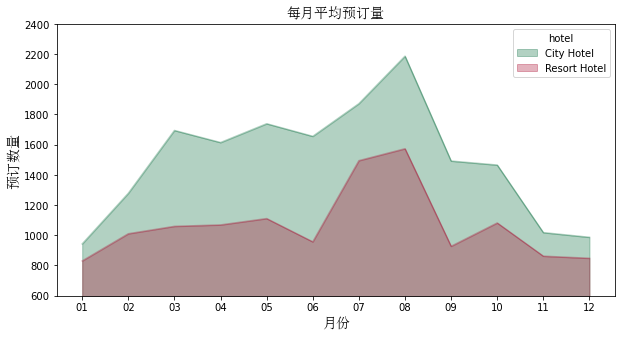

In [24]:
# 画面积图
a = month_data.unstack()   # 将series变成一个二维dataframe类型
a.shape
a.head

a = a.T
print(a.index.tolist)
b = a.index.tolist()

print(type(b))
print(a.columns.tolist())  # 
a.plot.area(stacked=False,alpha=0.3,colormap='RdYlGn_r',figsize=(10, 5),ylim=(600,2400))
plt.title('每月平均预订量', fontsize=14,fontproperties=my_font)
plt.xlabel('月份', fontsize=14,fontproperties=my_font)
plt.xticks(list(range(0,12))[::1],b[::1])
plt.ylabel('预订数量', fontsize=14,fontproperties=my_font)
plt.show()


### 月平均入住数分布情况
通过上图可以看出，7、8月份是入住高峰，每年12月至次年1月入住量明显下降
两类酒店的波动都很大，且变化趋势一致

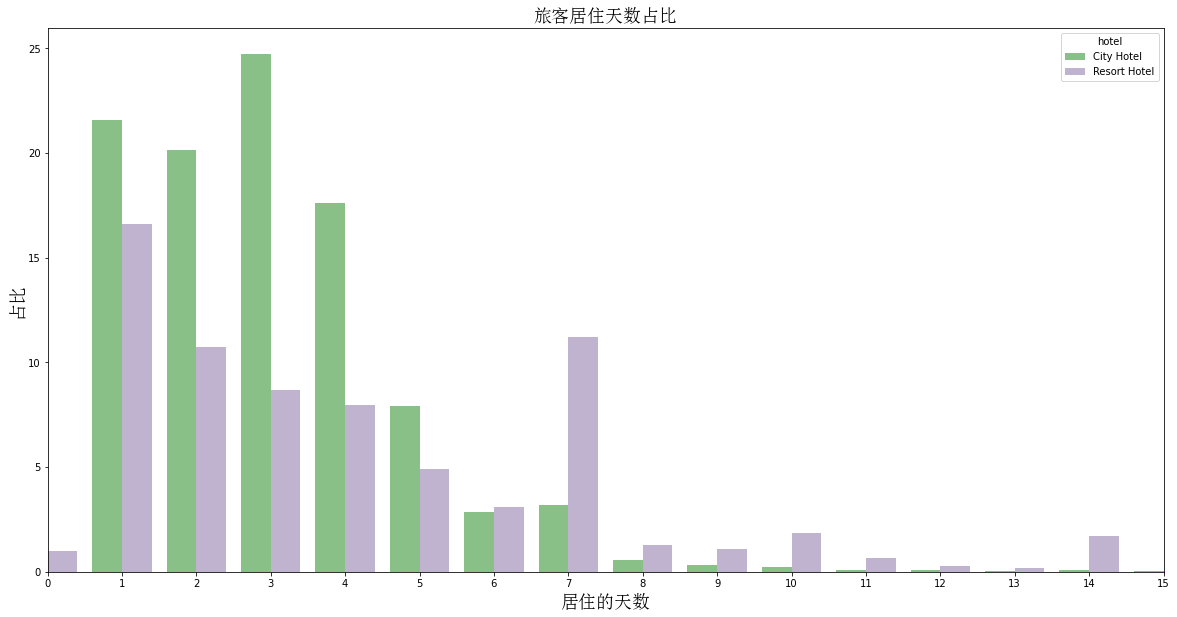

In [25]:
# 分析住户入住天数分布情况
# 1.首先确定顾客在酒店一共住了多少天，将stays_in_weekend_nights stays_in_week_nights这两列求和
nocancel_data["total_nights"] = (nocancel_data["stays_in_weekend_nights"] 
                                 + nocancel_data["stays_in_week_nights"])

# 2. 利用groupby将数据按照total_nights 和 hotel 进行分组,这里as_index很重要=false就是使用groupby的参数作为列名
night_data = nocancel_data.groupby(["hotel","total_nights"],as_index=False).agg({"is_canceled":"count"})

# 3. 拆分 cityhotel 和resort hotel的内容
c_hotel_data = night_data.loc[night_data["hotel"]=="City Hotel"]
r_hotel_data = night_data.loc[night_data["hotel"]=="Resort Hotel"]

# 4.因为酒店预定量不同，所以进行占比计算
c_hotel_data["numberofnight %"] = (c_hotel_data["is_canceled"]/c_hotel_data["is_canceled"].sum())*100
r_hotel_data["numberofnight %"] = (r_hotel_data["is_canceled"]/c_hotel_data["is_canceled"].sum())*100

# 5.将两类酒店的数据合并
night_data = pd.concat([c_hotel_data,r_hotel_data])

# 6.画图
plt.figure(figsize=(20,10))
sns.barplot(x="total_nights",y="numberofnight %",hue="hotel",data=night_data,palette="Accent")# palette配色
plt.xlim(0,15)
plt.xlabel("居住的天数",fontproperties=my_font,fontsize=18)
plt.ylabel("占比",fontproperties=my_font,fontsize=18)
plt.title("旅客居住天数占比",fontproperties=my_font,fontsize=18)
plt.show()

###  旅客居住天数分析
城市酒店旅客居住天数为1-4天，超过7天的非常少

而度假酒店超过7天的比例较大

这种差异或许与度假假期较长有关系


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


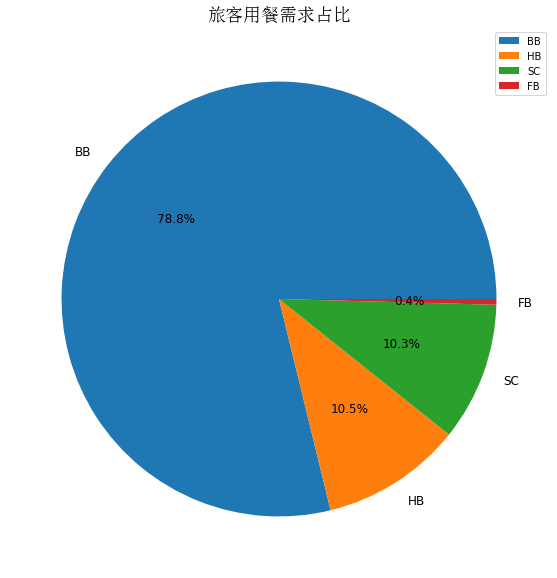

In [26]:
# 旅客用餐情况
# 筛选出用户用餐列，然后统计
meal_data = nocancel_data["meal"].value_counts()
plt.figure(figsize=(20,10))
plt.pie(meal_data,labels=meal_data.index,autopct="%.1f%%",textprops={'fontsize': 12})
plt.title("旅客用餐需求占比",fontproperties=my_font,fontsize=18)
plt.legend()
# 早餐BB：指包含在酒店入住期间的每日早餐，包括离开酒店当天的早餐。 
# 早晚餐HB：指包含在酒店入住期间的早餐和晚餐。 
# 三餐FB：指包含在酒店入住期间的每日三餐，但是不包含酒水。
# 一价全包AI：指包含在酒店入住期间的一切餐饮，每日三餐和酒水。

### 用户用餐需求分析 
通过上图可以看出用户大多数只安排早餐在酒店

Text(0, 0.5, '预定量')

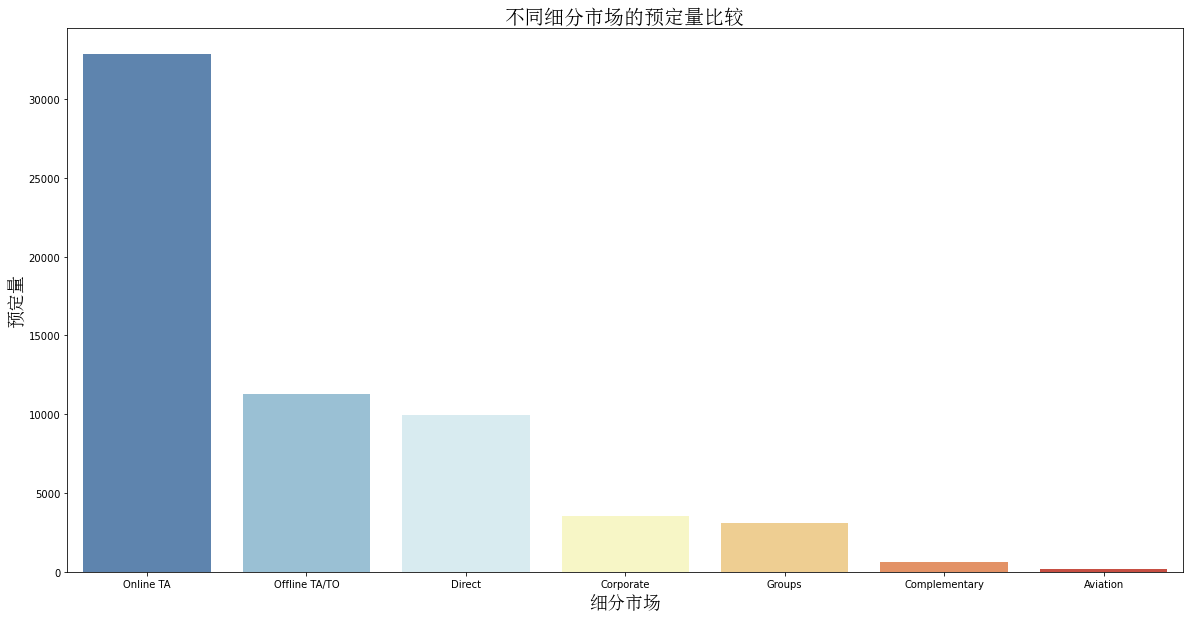

In [27]:
# 查看用户预定途径 market_segment的分布情况
plt.figure(figsize=(20,10))
sns.countplot(x="market_segment",
              data=nocancel_data,
              order=nocancel_data["market_segment"].value_counts().index,
              palette='RdYlBu_r')
plt.title('不同细分市场的预定量比较',fontsize=20,fontproperties=my_font)
plt.xlabel('细分市场',fontsize=18,fontproperties=my_font)
plt.ylabel('预定量',fontsize=18,fontproperties=my_font)
# TA代表travel agents旅行社；TO代表 tour operators旅游经营者

### 用户预定途径分析
通过上图可以看出，在线旅行社预定是绝大多数旅客的首选

其次是线下旅行社预定手段

## 销售经营分析

In [28]:
# adr列为平均每日收费，住宿期间的所有交易费用之和/住宿晚数
nocancel_data["total_price"] = nocancel_data["total_nights"]*nocancel_data["adr"]
# 计算每个月的销售总额，groupby聚合arrival_date_month
revenue_data = nocancel_data.groupby(["arrival_date_month","hotel"],as_index=False).agg({"total_price":"sum"})

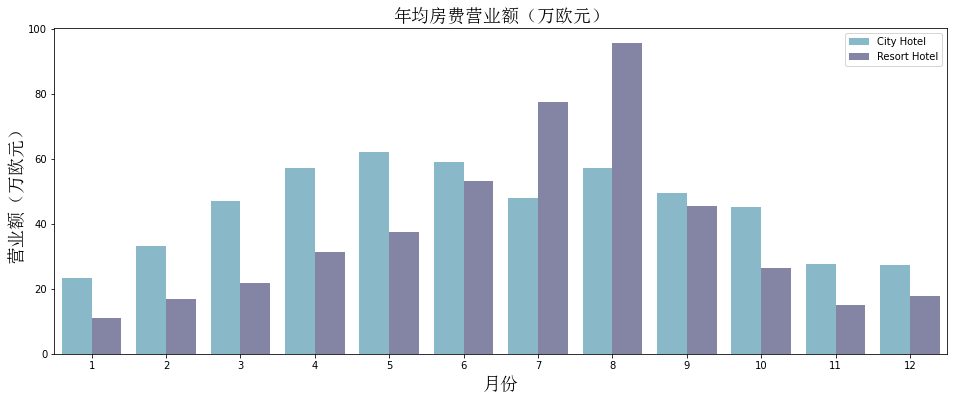

In [29]:
# 将revenue_data的arrival_date_month这一列进行排序,原本月份是字符串，建议改为int
revenue_data["arrival_date_month"] = revenue_data["arrival_date_month"].map({
    "01":1,
    "02":2,
    "03":3,
    "04":4,
    "05":5,
    "06":6,
    "07":7,
    "08":8,
    "09":9,
    "10":10,
    "11":11,
    "12":12
})

revenue_data=revenue_data.sort_values("arrival_date_month")

# revenue_data中7、8月份的数据被算了3次，其余月份被算了2次，我们计算平均值并进行万元级转化
revenue_data.loc[(revenue_data["arrival_date_month"]==7)|(revenue_data["arrival_date_month"]==8),"total_price"] /= 30000
revenue_data.loc[~((revenue_data["arrival_date_month"]==7)|(revenue_data["arrival_date_month"]==8)),"total_price"] /= 20000
# 利用sns.barplot画图，data=revenue_data,x="arrival_date_month",y="total_price",hue="hotel",palette = "ocean_r",alpha=0.5
# plt.figure,plt.title,plt.xlabel,plt.ylabel,plt.legend,plt.show()
plt.figure(figsize=(16,6))
sns.barplot(data=revenue_data,x="arrival_date_month",y="total_price",hue="hotel",palette="ocean_r",alpha=0.5)
plt.title("年均房费营业额（万欧元）",fontproperties=my_font,fontsize=18)
plt.xlabel("月份",fontproperties=my_font,fontsize=18)
plt.ylabel("营业额（万欧元）",fontproperties=my_font,fontsize=18)
plt.legend()


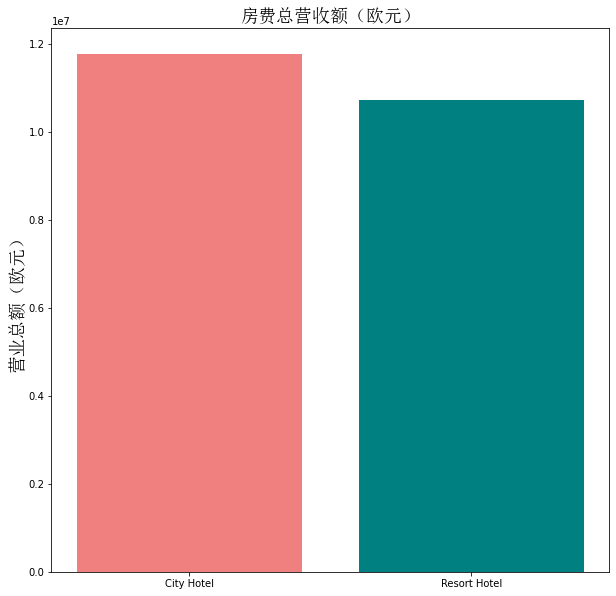

In [30]:
# 利用数据透视表，查看两类酒店的总收益
total_revenue_data = nocancel_data.pivot_table(index="hotel",values="total_price",aggfunc="sum")
# 画图
plt.figure(figsize=(10,10))
plt.bar(data=total_revenue_data,x=total_revenue_data.index,height="total_price",color=["lightcoral","teal"])
plt.title("房费总营收额（欧元）",fontproperties=my_font,fontsize=18)
plt.ylabel("营业总额（欧元）",fontproperties=my_font,fontsize=18)
plt.show()

### 月营业额对比
从上图可以看出，

城市酒店的营业额在4-6月和7-8月出现两次峰值

度假酒店则在7月出现峰值，具有明显的淡旺季

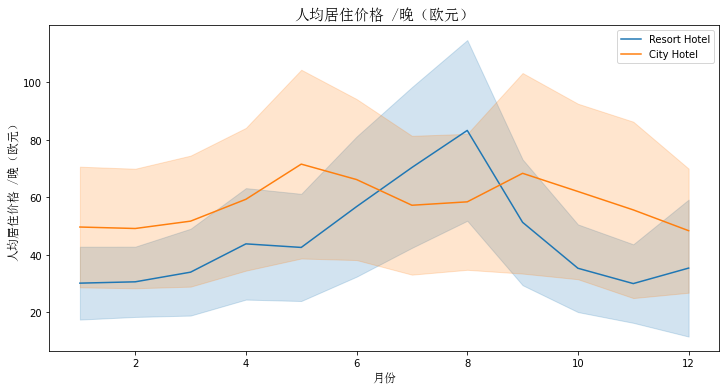

In [31]:
# 计算人均消费金额
nocancel_data["adr_per_person"] = nocancel_data["adr"]/(nocancel_data["adults"]+nocancel_data["children"])
# 提取 目标列 内容组成新df
adr_pp_data = nocancel_data[["hotel","arrival_date_month","adr_per_person"]]
# 为了方便排序，将月份进行更换
adr_pp_data["arrival_date_month"] = adr_pp_data["arrival_date_month"].map({
    "01":1,
    "02":2,
    "03":3,
    "04":4,
    "05":5,
    "06":6,
    "07":7,
    "08":8,
    "09":9,
    "10":10,
    "11":11,
    "12":12
})
# 按月份进行排序
adr_pp_data = adr_pp_data.sort_values("arrival_date_month")
# 画图
plt.figure(figsize=(12,6))
sns.lineplot(x="arrival_date_month",y="adr_per_person",data=adr_pp_data,hue="hotel",ci="sd")
plt.title("人均居住价格 /晚（欧元）",fontproperties=my_font,fontsize=15)
plt.xlabel("月份",fontproperties=my_font,fontsize=12)
plt.ylabel("人均居住价格 /晚（欧元）",fontproperties=my_font,fontsize=12)
plt.legend()

### 人均居住价格走势
从上图可以看出，城市酒店的人均居住价格走势较为平稳

度假酒店根据淡旺季情况变化，8月份预定量最高，单价也最高

全年最便宜的预定安排是：城市酒店12-2月，度假酒店1-2月

## 预定取消影响因素

从以下几个维度考察取消预定的影响因素

1.hotel 酒店类型

2.arrival_date_month 某日预定

3.meal 用餐需求
 
4.country 来自哪个国家

5.market_segment 细分市场-预定渠道（在线or线下）

6.distribution_channel 分销渠道-旅行社、个人代理

7.is_repeated_guest 老客

8.reserved_room_type 预定房间类型

9.assigned_room_type 分配的房型

10.deposit_type 预付定金类型

11.agent 预定旅行社代码

12.customer_type 客户类型

13.reservation_status 订单的最后状态：canceled（订单取消）Check-Out（客户已入住并退房）No-show（客户没有出现，并且告知酒店原因）

使用sklearn.preprocessing中的LabelEncode库进行标签化处理

LabelEncode中的fit_transform(y)可以先将y序列进行分类，每一类给一个编号，并返回分组后的结果

比如[小王，小王，小李，小张，小夏，小李]其中包含王、李、张、夏4个人，那么转换后变成[1,1,2,3,4,2]

具体教程见：https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform

In [32]:
from sklearn.preprocessing import LabelEncoder
df1_copy = df1.copy() # copy操作避免数据污染
# 创建一个实例
le= LabelEncoder()
# 因为之前没有对contry数据进行nan预处理，此处舍弃4.维度
df1_copy["hotel"] = le.fit_transform(df1_copy["hotel"])
df1_copy["arrival_date_month"] = le.fit_transform(df1_copy["arrival_date_month"])
df1_copy["meal"] = le.fit_transform(df1_copy["meal"])
df1_copy["market_segment"] = le.fit_transform(df1_copy["market_segment"])
df1_copy["distribution_channel"] = le.fit_transform(df1_copy["distribution_channel"])
df1_copy["is_repeated_guest"] = le.fit_transform(df1_copy["is_repeated_guest"])
df1_copy["reserved_room_type"] = le.fit_transform(df1_copy["reserved_room_type"])
df1_copy["assigned_room_type"] = le.fit_transform(df1_copy["assigned_room_type"])
df1_copy["deposit_type"] = le.fit_transform(df1_copy["deposit_type"])
df1_copy["agent"] = le.fit_transform(df1_copy["agent"])
df1_copy["customer_type"] = le.fit_transform(df1_copy["customer_type"])
df1_copy["reservation_status"] = le.fit_transform(df1_copy["reservation_status"])

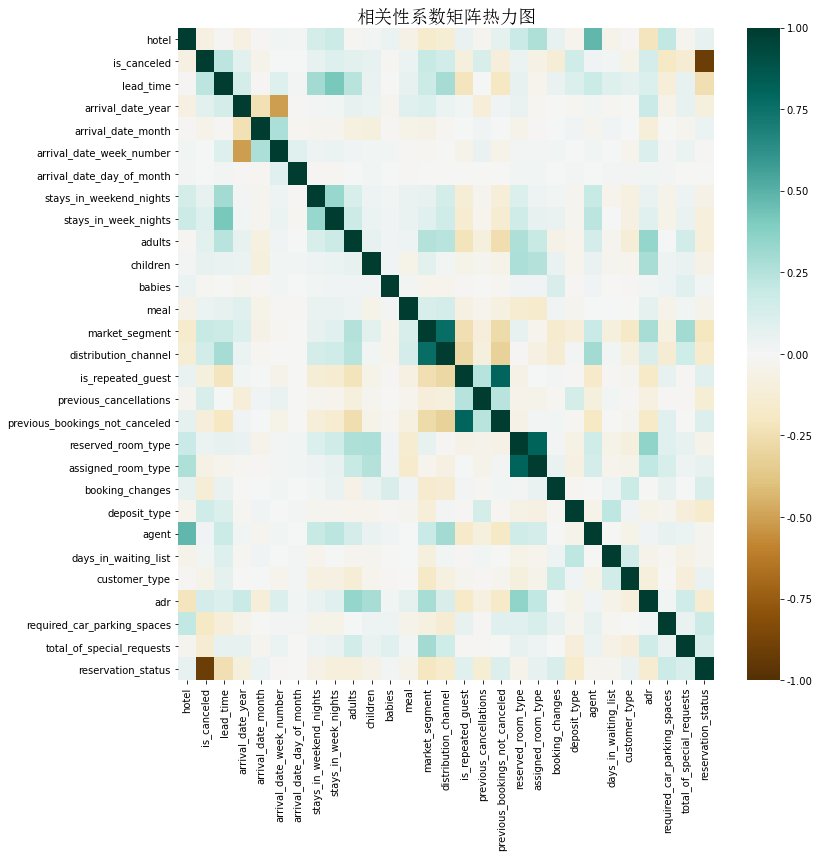

In [33]:
# 进行相关性计算，https://blog.csdn.net/walking_visitor/article/details/85128461
data_cor = df1_copy.corr(method="spearman")

plt.figure(figsize=(12,12))
sns.heatmap(data_cor,cmap="BrBG",vmin=-1,vmax=1)
plt.title("相关性系数矩阵热力图",fontproperties=my_font,size=18, weight="bold")
plt.show()

In [34]:
# 对相关函数的is_canceled列进行数值排序
np.abs(data_cor["is_canceled"]).sort_values(ascending=False)

is_canceled                       1.000000
reservation_status                0.913507
lead_time                         0.231660
market_segment                    0.202399
required_car_parking_spaces       0.190812
deposit_type                      0.157571
distribution_channel              0.152923
adr                               0.139896
total_of_special_requests         0.133474
previous_cancellations            0.125436
booking_changes                   0.123430
previous_bookings_not_canceled    0.106612
stays_in_week_nights              0.093814
is_repeated_guest                 0.091455
arrival_date_year                 0.085087
adults                            0.082489
hotel                             0.077894
assigned_room_type                0.070089
stays_in_weekend_nights           0.058141
children                          0.057924
customer_type                     0.051565
meal                              0.044421
arrival_date_month                0.041034
reserved_ro

In [35]:
data_cor["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.231660
market_segment                    0.202399
deposit_type                      0.157571
distribution_channel              0.152923
adr                               0.139896
previous_cancellations            0.125436
stays_in_week_nights              0.093814
arrival_date_year                 0.085087
adults                            0.082489
stays_in_weekend_nights           0.058141
children                          0.057924
meal                              0.044421
reserved_room_type                0.040507
agent                             0.025222
days_in_waiting_list              0.021147
arrival_date_day_of_month         0.005948
arrival_date_week_number          0.001537
babies                           -0.022651
arrival_date_month               -0.041034
customer_type                    -0.051565
assigned_room_type               -0.070089
hotel                            -0.077894
is_repeated

通过分析不同要素间的相关性发现，与订单取消有一定相关性的前几个因素是：

required_car_parking_spaces 客户要求的停车位数

lead_time 提前预定的时间

market_segment 细分市场 

deposit_type 预付定金类型，是否可以退还  

distribution_channel 预定的途径 

total_of_special_requests 客户提出的特殊要求的数量  

previous_cancellations  之前的取消数

或许将两类酒店分开统筹比较好

In [36]:
# 考察预定的支付方式和取消率的区别，将df1的
deposit_data = df1.groupby("deposit_type")["is_canceled"].describe()
deposit_data

# 这里对deposit_data中的数据进行解释：
'''
因为is_canceled这一列是0或1，且1代表取消了
例如 Non_Refund这一类，mean = 所有数值求和/一共多少个数值，所有数值的和其实就是is_canceled=1的个数
那么mean的值代表了取消率
'''

'\n因为is_canceled这一列是0或1，且1代表取消了\n例如 Non_Refund这一类，mean = 所有数值求和/一共多少个数值，所有数值的和其实就是is_canceled=1的个数\n那么mean的值代表了取消率\n'

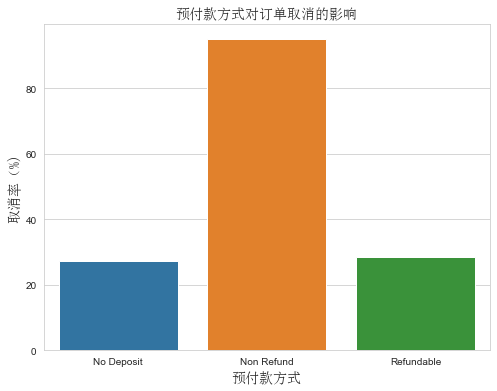

In [37]:
# xlabel = deposit_data.index.map({
#     "No Deposit":"无预付保证金",
#     "Non Refund":"全额预定取消不退款",
#     "Refundable":"部分预付取消课退款"    
# })
plt.figure(figsize=(8,6))

sns.set_style("whitegrid")

sns.barplot(x=deposit_data.index, 
            y=deposit_data["mean"]*100, 
            order=['No Deposit','Non Refund','Refundable'])

plt.title("预付款方式对订单取消的影响",fontproperties=my_font,fontsize=14)

plt.xlabel("预付款方式",fontsize=14,fontproperties=my_font)

plt.ylabel("取消率（%)",fontproperties=my_font,fontsize=14)

plt.show()

### 预付款方式与取消率关系

No Deposit：无预付保证金

Non Refund deposit_type:提前预付全部房款，取消不退款

Refundable:提前预付部分房款，取消可退款

从上图发现，全额预付房款且不能退款的取消率最高，这与正常逻辑不符，可能为数据自身有问题

In [38]:
lead_data = data.groupby("lead_time")["is_canceled"].describe()

lead_data = lead_data.reset_index()
# 之所以在这reset_index是因为下面第五行x需要用到lead_time列，所以就把lead_time从index还原成一列

lead_data

,lead_time,count,mean,std,min,25%,50%,75%,max
0,0,6345.0,0.067770,0.251370,0.0,0.0,0.0,0.0,1.0
1,1,3460.0,0.092775,0.290158,0.0,0.0,0.0,0.0,1.0
2,2,2069.0,0.102948,0.303965,0.0,0.0,0.0,0.0,1.0
3,3,1816.0,0.100220,0.300376,0.0,0.0,0.0,0.0,1.0
4,4,1715.0,0.102624,0.303556,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
474,622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
475,626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
476,629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
477,709,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


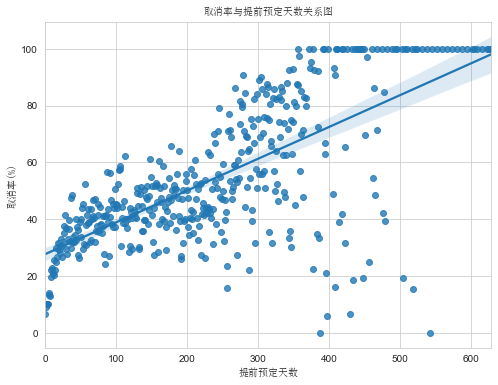

In [39]:
lead_data = lead_data.loc[lead_data["count"]>=10] # 小于10天没有参考意义

plt.figure(figsize=(8,6))

sns.regplot(x=lead_data["lead_time"], y=lead_data["mean"]*100, data=lead_data)

plt.title("取消率与提前预定天数关系图",fontproperties=my_font)

plt.xlabel("提前预定天数", fontproperties=my_font)

plt.ylabel("取消率(%)",fontproperties=my_font)

plt.show()

### 提前预定天数与取消率关系
从上图可得，提前预定天数越短，客户越趋于不取消订单；

当提前天数非常大时，取消率非常高，这与“用户行为分析”中的分析结论一致

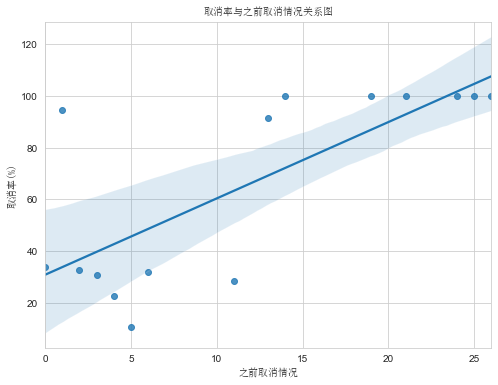

In [40]:
pre_cancel_data = data.groupby("previous_cancellations")["is_canceled"].describe().reset_index()

plt.figure(figsize=(8,6))

sns.regplot(x=pre_cancel_data["previous_cancellations"], y=pre_cancel_data["mean"]*100, data=pre_cancel_data)

plt.title("取消率与之前取消情况关系图",fontproperties=my_font)

plt.xlabel("之前取消情况", fontproperties=my_font)

plt.ylabel("取消率(%)",fontproperties=my_font)

plt.show()

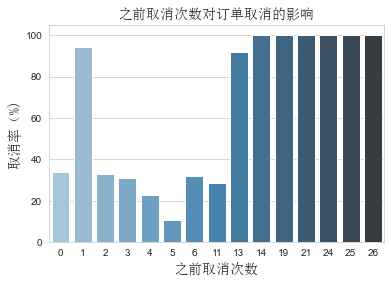

In [41]:
sns.barplot(x=pre_cancel_data["previous_cancellations"], 
            y=pre_cancel_data["mean"]*100, 
            palette="Blues_d"
)

plt.title("之前取消次数对订单取消的影响",fontproperties=my_font,fontsize=14)

plt.xlabel("之前取消次数",fontsize=14,fontproperties=my_font)

plt.ylabel("取消率（%)",fontproperties=my_font,fontsize=14)

plt.show()

### 之前取消情况与取消率关系

从2张图可以看出，数据以之前取消过13次为界，大致分两部分

1.之前取消过1次的，此次取消的概率为94%，其他取消率均不超过35%

2.之前取消的次数超过13次的客户，此次取消的概率同样比较大，这个应该与客户的行为习惯有关

###  不同渠道与取消率的关系

In [42]:
# 探究预定渠道与取消率之间的关系

market_segment_data =df1.groupby("market_segment")["is_canceled"].describe().reset_index()# ["mean"]

market_segment_data

# # 查看用户预定途径 market_segment的分布情况
# plt.figure(figsize=(20,10))
# sns.countplot(x="market_segment",
#               data=nocancel_data,
#               order=nocancel_data["market_segment"].value_counts().index,
#               palette='RdYlBu_r')
# plt.title('不同细分市场的预定量比较',fontsize=20,fontproperties=my_font)
# plt.xlabel('细分市场',fontsize=18,fontproperties=my_font)
# plt.ylabel('预定量',fontsize=18,fontproperties=my_font)
# # TA代表travel agents旅行社；TO代表 tour operators旅游经营者

,market_segment,count,mean,std,min,25%,50%,75%,max
0,Aviation,205.0,0.219512,0.414929,0.0,0.0,0.0,0.0,1.0
1,Complementary,692.0,0.127168,0.333402,0.0,0.0,0.0,0.0,1.0
2,Corporate,4064.0,0.125492,0.331317,0.0,0.0,0.0,0.0,1.0
3,Direct,11672.0,0.148818,0.355924,0.0,0.0,0.0,0.0,1.0
4,Groups,4414.0,0.301994,0.459175,0.0,0.0,0.0,1.0,1.0
5,Offline TA/TO,13350.0,0.154307,0.361256,0.0,0.0,0.0,0.0,1.0
6,Online TA,51080.0,0.356969,0.479110,0.0,0.0,0.0,1.0,1.0
7,Undefined,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Text(0, 0.5, '不同渠道取消率%')

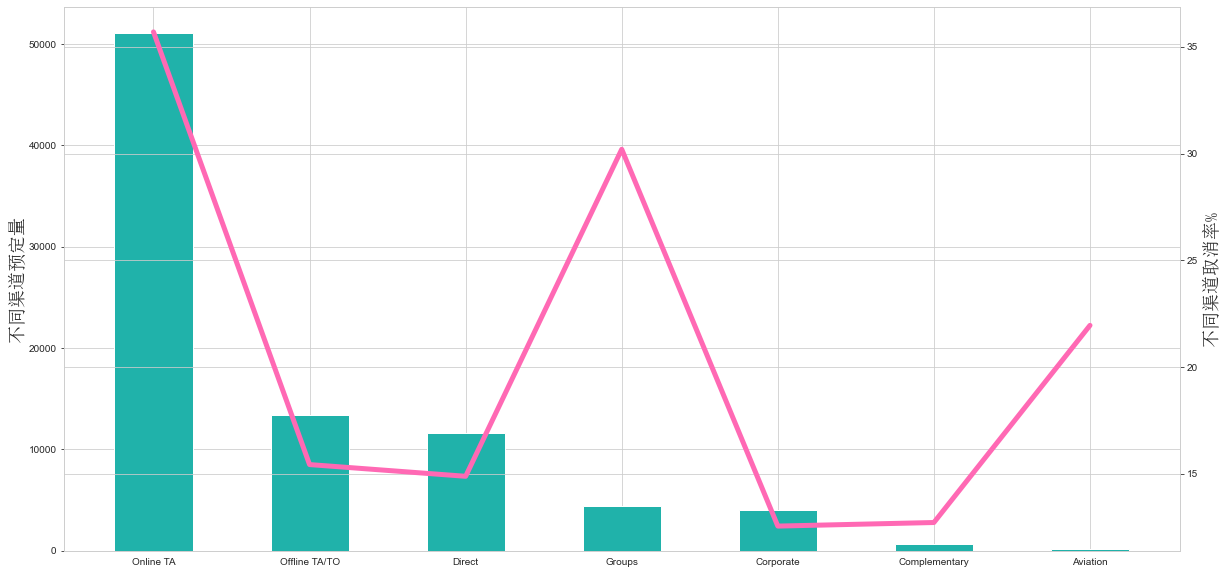

In [43]:
# 去除第7行Undefined这一行，因为就2个数据，感觉无效
market_segment_data.drop(index=(market_segment_data.loc[(market_segment_data['market_segment']=='Undefined')].index),inplace=True)

# 利用market_segment_data中的count做bar图，利用mean做is_canceled折线图
market_segment_data = market_segment_data.sort_values(by="count",ascending=False)

msd_count = list(market_segment_data["count"]) # 做bar
msd_mean = list(market_segment_data["mean"]*100) # 做plot
x = list(market_segment_data["market_segment"])

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.bar(x,msd_count,width=0.5,color="lightseagreen",label="预定量")
ax1.set_ylabel("不同渠道预定量",fontproperties=my_font,fontsize=18)


ax2 = ax1.twinx()
ax2.plot(x,msd_mean,"hotpink",linewidth=5,label="取消率")
ax2.set_ylabel("不同渠道取消率%",fontproperties=my_font,fontsize=18)

In [44]:
market_segment_data

,market_segment,count,mean,std,min,25%,50%,75%,max
6,Online TA,51080.0,0.356969,0.479110,0.0,0.0,0.0,1.0,1.0
5,Offline TA/TO,13350.0,0.154307,0.361256,0.0,0.0,0.0,0.0,1.0
3,Direct,11672.0,0.148818,0.355924,0.0,0.0,0.0,0.0,1.0
4,Groups,4414.0,0.301994,0.459175,0.0,0.0,0.0,1.0,1.0
2,Corporate,4064.0,0.125492,0.331317,0.0,0.0,0.0,0.0,1.0
1,Complementary,692.0,0.127168,0.333402,0.0,0.0,0.0,0.0,1.0
0,Aviation,205.0,0.219512,0.414929,0.0,0.0,0.0,0.0,1.0


Text(0, 0.5, '取消率 %')

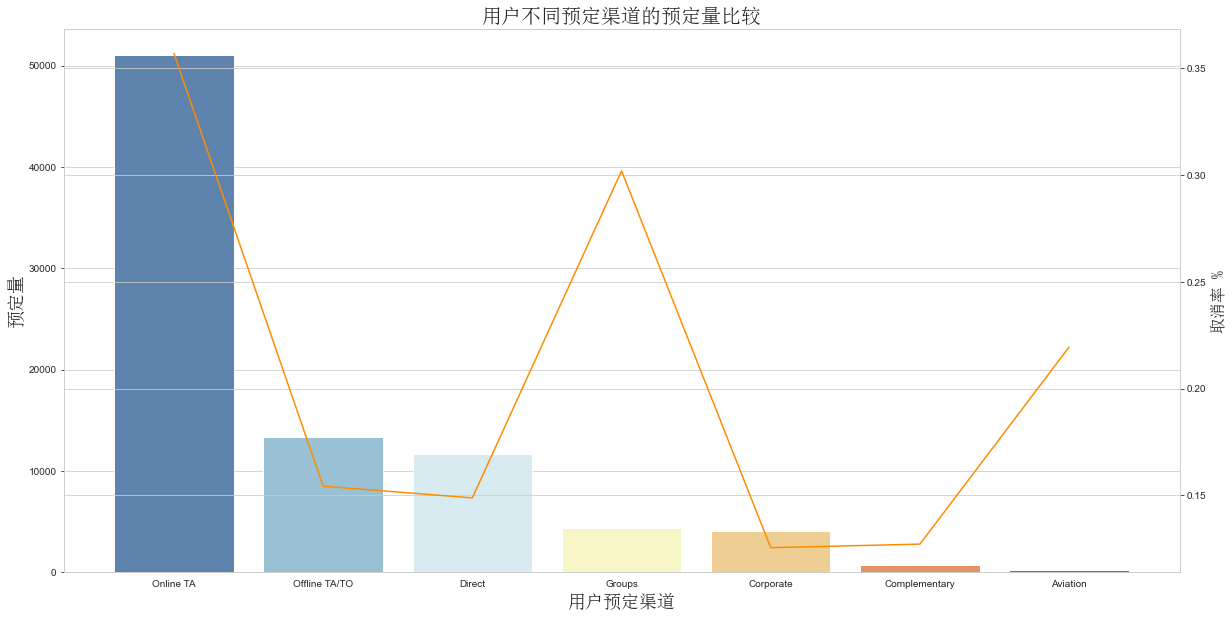

In [45]:
# 查看用户预定途径 market_segment的分布情况
fig,ax1 = plt.subplots(figsize=(20,10))
ax1 = sns.barplot(x="market_segment",
                    y="count",
                    data=market_segment_data,
                    palette='RdYlBu_r')
ax1.set_title('用户不同预定渠道的预定量比较',fontsize=20,fontproperties=my_font)
ax1.set_xlabel('用户预定渠道',fontsize=18,fontproperties=my_font)
ax1.set_ylabel('预定量',fontsize=18,fontproperties=my_font)
# TA代表travel agents旅行社；TO代表 tour operators旅游经营者
ax2 = ax1.twinx()
ax2 = sns.lineplot(x="market_segment",
                   y="mean",
                   color='darkorange',
                   sizes=100,
                   markers=True,
                   dashes=False,
                   data=market_segment_data)

ax2.set_ylabel('取消率 %',fontproperties=my_font,fontsize=16)

### 停车位对取消率的影响

In [46]:
# 先获取停车位与取消率的数据
required_car_parking_data =df1.groupby("required_car_parking_spaces")["is_canceled"].describe().reset_index()
required_car_parking_data

,required_car_parking_spaces,count,mean,std,min,25%,50%,75%,max
0,0,78190.0,0.30706,0.461277,0.0,0.0,0.0,1.0,1.0
1,1,7256.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
2,2,28.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,3.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
4,8,2.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


### 分销渠道对订单取消的影响distribution_channel

In [47]:
distribution_channel_data =df1.groupby("distribution_channel")["is_canceled"].describe().reset_index()
distribution_channel_data

,distribution_channel,count,mean,std,min,25%,50%,75%,max
0,Corporate,4793.0,0.135197,0.341970,0.0,0.0,0.0,0.0,1.0
1,Direct,12803.0,0.150355,0.357433,0.0,0.0,0.0,0.0,1.0
2,GDS,175.0,0.205714,0.405383,0.0,0.0,0.0,0.0,1.0
3,TA/TO,67703.0,0.316027,0.464927,0.0,0.0,0.0,1.0,1.0
4,Undefined,5.0,0.800000,0.447214,0.0,1.0,1.0,1.0,1.0


### 房费价格（adr）对订单取消的影响

In [48]:
adr_data = df1.groupby("adr")["is_canceled"].describe().reset_index()
adr_data
# 以下结果中5400元为错误数据，-6.38也是错误数据，如何处理这样离散的价格数据并分析其与取消率的关系呢？

,adr,count,mean,std,min,25%,50%,75%,max
0,-6.38,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1,0.00,1646.0,0.112394,0.315946,0.0,0.0,0.0,0.0,1.0
2,0.26,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
3,0.50,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
4,1.00,12.0,0.166667,0.389249,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
8861,450.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
8862,451.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
8863,508.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
8864,510.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [49]:
# 去除-6.38和5400的数据
minus_data = adr_data[adr_data["adr"]==-6.38].index
adr_data.drop(8865,inplace=True)
adr_data

,adr,count,mean,std,min,25%,50%,75%,max
0,-6.38,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
1,0.00,1646.0,0.112394,0.315946,0.0,0.0,0.0,0.0,1.0
2,0.26,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
3,0.50,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
4,1.00,12.0,0.166667,0.389249,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
8860,437.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
8861,450.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
8862,451.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
8863,508.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [50]:
# 对于离散的数据，尝试使用分层的方式处理
# 按照0-150，150-300，300-450，450+元进行分层，
# 对于每一层，我们需要知道订单总数和取消率

In [116]:
adr_r1 = adr_data.loc[(adr_data["adr"]>0)&(adr_data["adr"]<=150)]
adr_r2 = adr_data.loc[(adr_data["adr"]>150)&(adr_data["adr"]<=300)]
adr_r3 = adr_data.loc[(adr_data["adr"]>300)&(adr_data["adr"]<=450)]
adr_r4 = adr_data.loc[(adr_data["adr"]>450)]
adr_r1["adrrank"] = "RANK1"
adr_r2["adrrank"] = "RANK2"
adr_r3["adrrank"] = "RANK3"
adr_r4["adrrank"] = "RANK4"

In [117]:
# 计算出4层的取消数
adr_r1["canceled_num"] = adr_r1["count"].multiply(adr_r1["mean"], axis="index")
adr_r2["canceled_num"] = adr_r2["count"].multiply(adr_r2["mean"], axis="index")
adr_r3["canceled_num"] = adr_r3["count"].multiply(adr_r3["mean"], axis="index")
adr_r4["canceled_num"] = adr_r4["count"].multiply(adr_r4["mean"], axis="index")

In [124]:
# 计算出4层的订单总数
adr1_count = int(adr_r1.groupby("adrrank")["count"].sum())
adr2_count = int(adr_r2.groupby("adrrank")["count"].sum())
adr3_count = int(adr_r3.groupby("adrrank")["count"].sum())
adr4_count = int(adr_r4.groupby("adrrank")["count"].sum())

count_list = [adr1_count,adr2_count,adr3_count,adr4_count]

In [136]:
# 计算出4层的订单取消总数,并计算出取消率
adr1_cancel_num = int(adr_r1["canceled_num"].sum())
adr2_cancel_num = int(adr_r2["canceled_num"].sum())
adr3_cancel_num = int(adr_r3["canceled_num"].sum())
adr4_cancel_num = int(adr_r4["canceled_num"].sum())
cancel_num_list = [float(adr1_cancel_num/adr1_count)*100,
                   float(adr2_cancel_num/adr1_count)*100,
                   float(adr3_cancel_num/adr1_count)*100,
                   float(adr4_cancel_num/adr1_count)*100]

In [141]:
dict1 = {
    "不同价位预定量":count_list,
    "不同价位取消率":cancel_num_list
}
# df2=pd.DataFrame(dict,index=[1,2,3,4])
adr_cancel_rate = pd.DataFrame(
    dict1,
    index=["0-150","150-300","300-450","450+"]
)
adr_cancel_rate


,不同价位预定量,不同价位取消率
0-150,68833,26.907152
150-300,14740,7.579213
300-450,255,0.123487
450+,3,0.000000


Text(0, 0.5, '取消率 %')

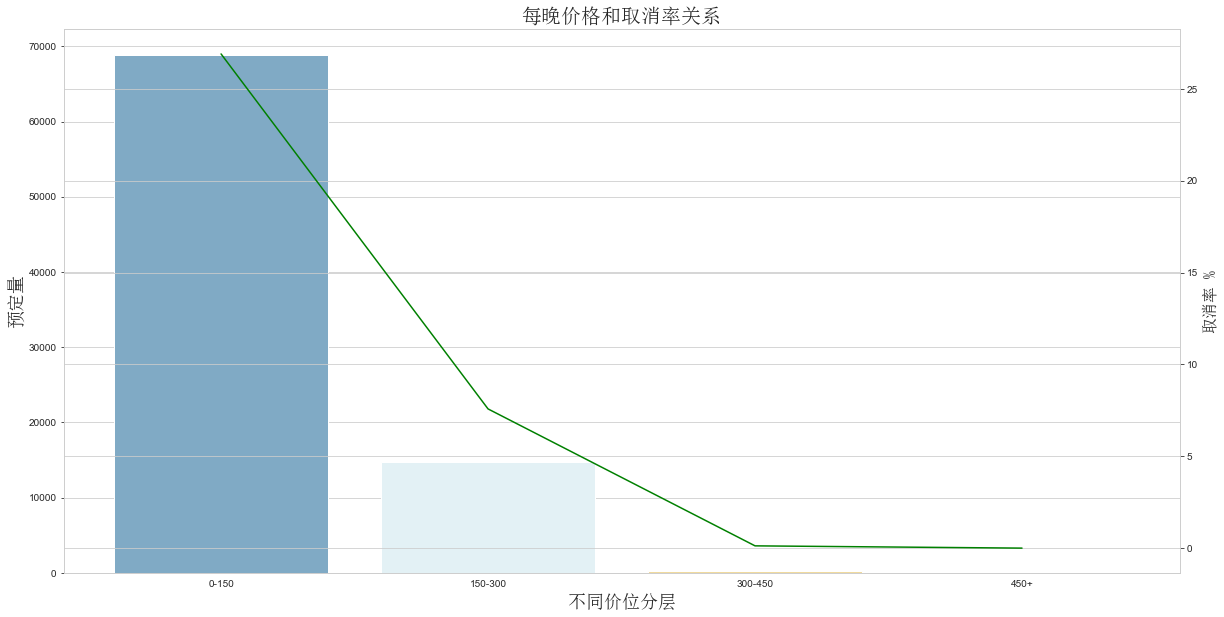

In [145]:
# 查看用户预定途径 adr_cancel_rate的分布情况
fig,ax1 = plt.subplots(figsize=(20,10))
ax1 = sns.barplot(x=list(adr_cancel_rate.index),
                    y="不同价位预定量",
                    data=adr_cancel_rate,
                    palette='RdYlBu_r')
ax1.set_title('每晚价格和取消率关系',fontsize=20,fontproperties=my_font)
ax1.set_xlabel('不同价位分层',fontsize=18,fontproperties=my_font)
ax1.set_ylabel('预定量',fontsize=18,fontproperties=my_font)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x=list(adr_cancel_rate.index),
                   y="不同价位取消率",
                   color='g',
                   sizes=100,
                   markers=True,
                   dashes=False,
                   data=adr_cancel_rate)

ax2.set_ylabel('取消率 %',fontproperties=my_font,fontsize=16)

In [144]:
adr_r4


,adr,count,mean,std,min,25%,50%,75%,max
8862,451.5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
8863,508.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
8864,510.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [106]:
num = adr_r1.groupby("adrrank")["count"].sum()
cancel_rate = adr_r1["canceled_num"].sum()/num['RANK1']
cancel_rate

0.23377145288638834

## 总结

### 数据分析思路
1.此项目内容较为简单，多为描述性分析。主要从“酒店运营基本情况”、“用户行为”、“销售行为”以及“预定取消影响因素”等方面进行了处理与展示；

2.未来掌握更多分析技巧可以尝试与机器学习的算法相结合
### 分析工具的理解

1.所有数据均采用python进行处理和可视化展示，python强大的函数工具确实可满足各种需求

但相较于excel与tableau可视化工具则相对繁琐。不过未来数据处理一定向着人工智能进发，python作为人工智能热门语言，仍是数据处理的首选


